# **Unsupervised Machine Learning**

# **Predict the optimum number of clusters and represent it visually from the given [IRIS](https://bit.ly/3kXTdox) dataset**

# **Author : Aman**

# **Import all the essential libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **Loading the Dataset**

In [11]:
df1=pd.read_csv("/content/Iris.csv")
df1.head() # To obtain the first 5 entries of the Dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Preparing the Dataset**

In [12]:
df1.shape #To obtain the number of rows and columns in the Dataset

(150, 6)

In [13]:
df1.info() # To get the information of the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
df1.isna().sum() # To obtain the count of null values in the Dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
df1.drop(columns=["Id","Species"],axis=1,inplace=True) # To drop the columns ,Id amd Species from the dataset
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df1.shape

(150, 4)

In [17]:
df1.info() # To get the information of the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [19]:
df1.describe() # To Describe the Dataset Statistically

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Using the Elbow method to predict the optimum number of clusters**

In [22]:
css=[]
for i in range(1,12):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(df1)  # To train the model and create classifier
  css.append(kmeans.inertia_) # To obatin the within cluster sum of square
css


[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972,
 25.95549708624709,
 24.416268037518037]

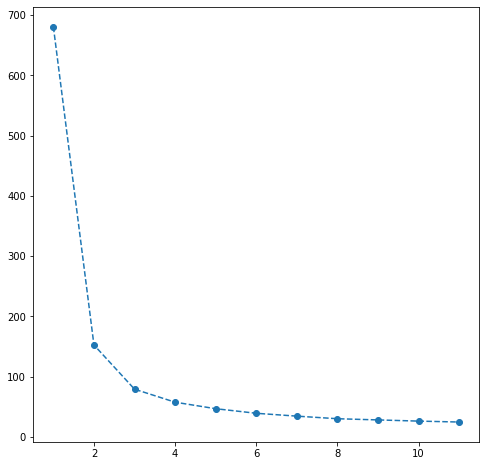

In [23]:
plt.figure(figsize=(8,8))
plt.plot(range(1,12),css,"o--")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Square")
plt.title("Elbow Method")

**Since the elbow point is at 3, therefore, the number of optimum clusters is 3**

# **Creating K-Means Classifier**

In [26]:
kmeans=KMeans(n_clusters=3, random_state=0)
y=kmeans.fit_predict(df1) #To train the model, create classifier and prediction for the dataset

In [27]:
y #The predicted cluster for the dataset

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [28]:
kmeans.cluster_centers_ #To obtain the centroids of the clusters formed

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

# **Visualization of the Clusters¶**

Text(0.5, 1.0, 'K-Means Clustering')

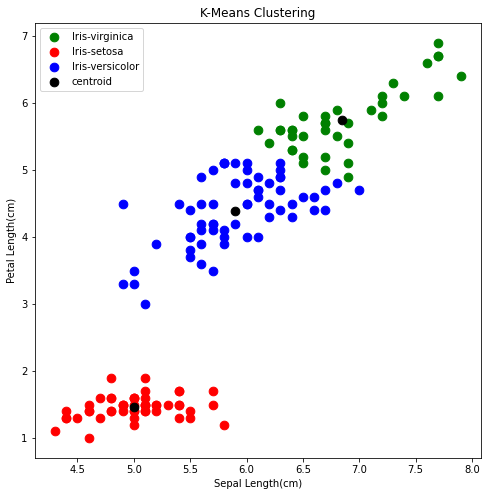

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(df1.iloc[y==0,0],df1.iloc[y==0,2],s=75,c="green",label="Iris-virginica")
plt.scatter(df1.iloc[y==1,0],df1.iloc[y==1,2],s=75,c="red",label="Iris-setosa")
plt.scatter(df1.iloc[y==2,0],df1.iloc[y==2,2],s=75,c="blue",label="Iris-versicolor")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=75,c="black",label="centroid")
plt.legend()
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Petal Length(cm)")
plt.title("K-Means Clustering")

# **ThankYou**